In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Load the dataset
data = pd.read_csv('fraudTrain.csv')

# Inspect the dataset to check column names
print(data.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [32]:
# Check for missing values
print(data.isnull().sum())

# Drop columns that are not needed
data = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1)

# Check and handle missing values in 'is_fraud'
data = data.dropna(subset=['is_fraud'])

# Identify categorical and numerical columns
categorical_features = ['merchant', 'category', 'gender']
numerical_features = ['amt', 'city_pop']

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define features and target variable
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     16180
         1.0       0.21      0.04      0.06       161

    accuracy                           0.99     16341
   macro avg       0.60      0.52      0.53     16341
weighted avg       0.98      0.99      0.99     16341

[[16157    23]
 [  155     6]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


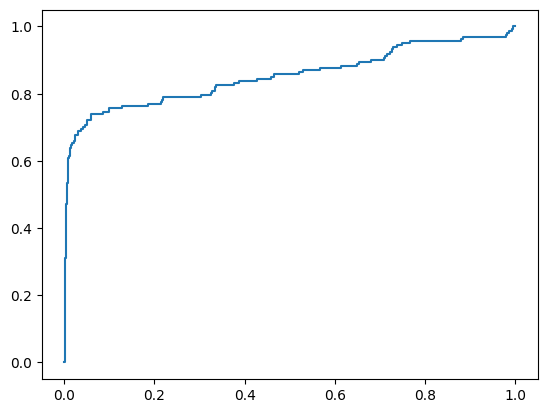

In [33]:
# Logistic Regression
model.set_params(classifier=LogisticRegression())
model.fit(X_train, y_train)

# Predictions
y_pred_lr = model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# ROC Curve
y_prob_lr = model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_lr)))


Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16180
         1.0       0.64      0.71      0.68       161

    accuracy                           0.99     16341
   macro avg       0.82      0.86      0.84     16341
weighted avg       0.99      0.99      0.99     16341

[[16116    64]
 [   46   115]]


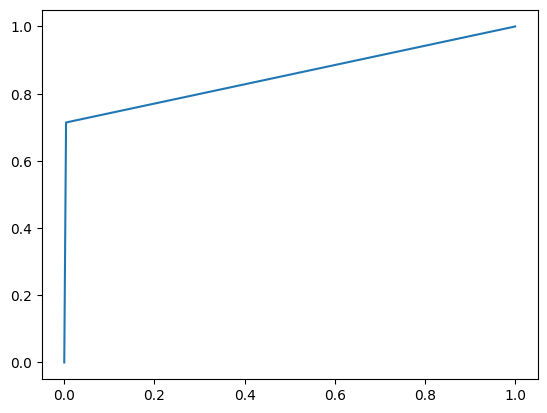

In [34]:
# Decision Tree
model.set_params(classifier=DecisionTreeClassifier())
model.fit(X_train, y_train)

# Predictions
y_pred_dt = model.predict(X_test)

# Evaluation
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# ROC Curve
y_prob_dt = model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))


Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16180
         1.0       0.83      0.66      0.73       161

    accuracy                           1.00     16341
   macro avg       0.91      0.83      0.87     16341
weighted avg       0.99      1.00      1.00     16341

[[16158    22]
 [   55   106]]


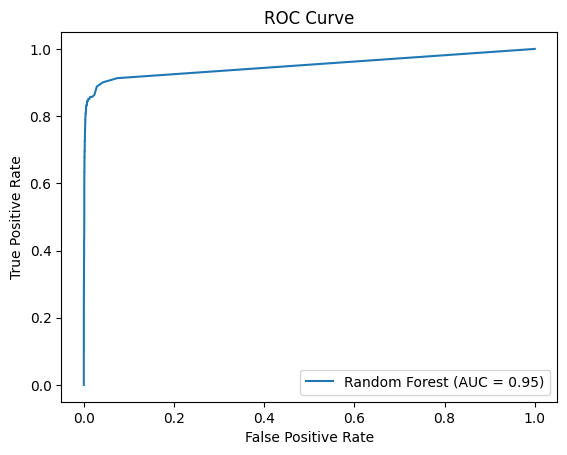

In [35]:
# Random Forest
model.set_params(classifier=RandomForestClassifier())
model.fit(X_train, y_train)

# Predictions
y_pred_rf = model.predict(X_test)

# Evaluation
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# ROC Curve
y_prob_rf = model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))

# Show ROC Curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [37]:
# Print AUC scores
print("AUC Scores:")
print(f"Logistic Regression: {roc_auc_score(y_test, y_prob_lr):.2f}")
print(f"Decision Tree: {roc_auc_score(y_test, y_prob_dt):.2f}")
print(f"Random Forest: {roc_auc_score(y_test, y_prob_rf):.2f}")


AUC Scores:
Logistic Regression: 0.85
Decision Tree: 0.86
Random Forest: 0.95
